from object
to datetime64[ns]


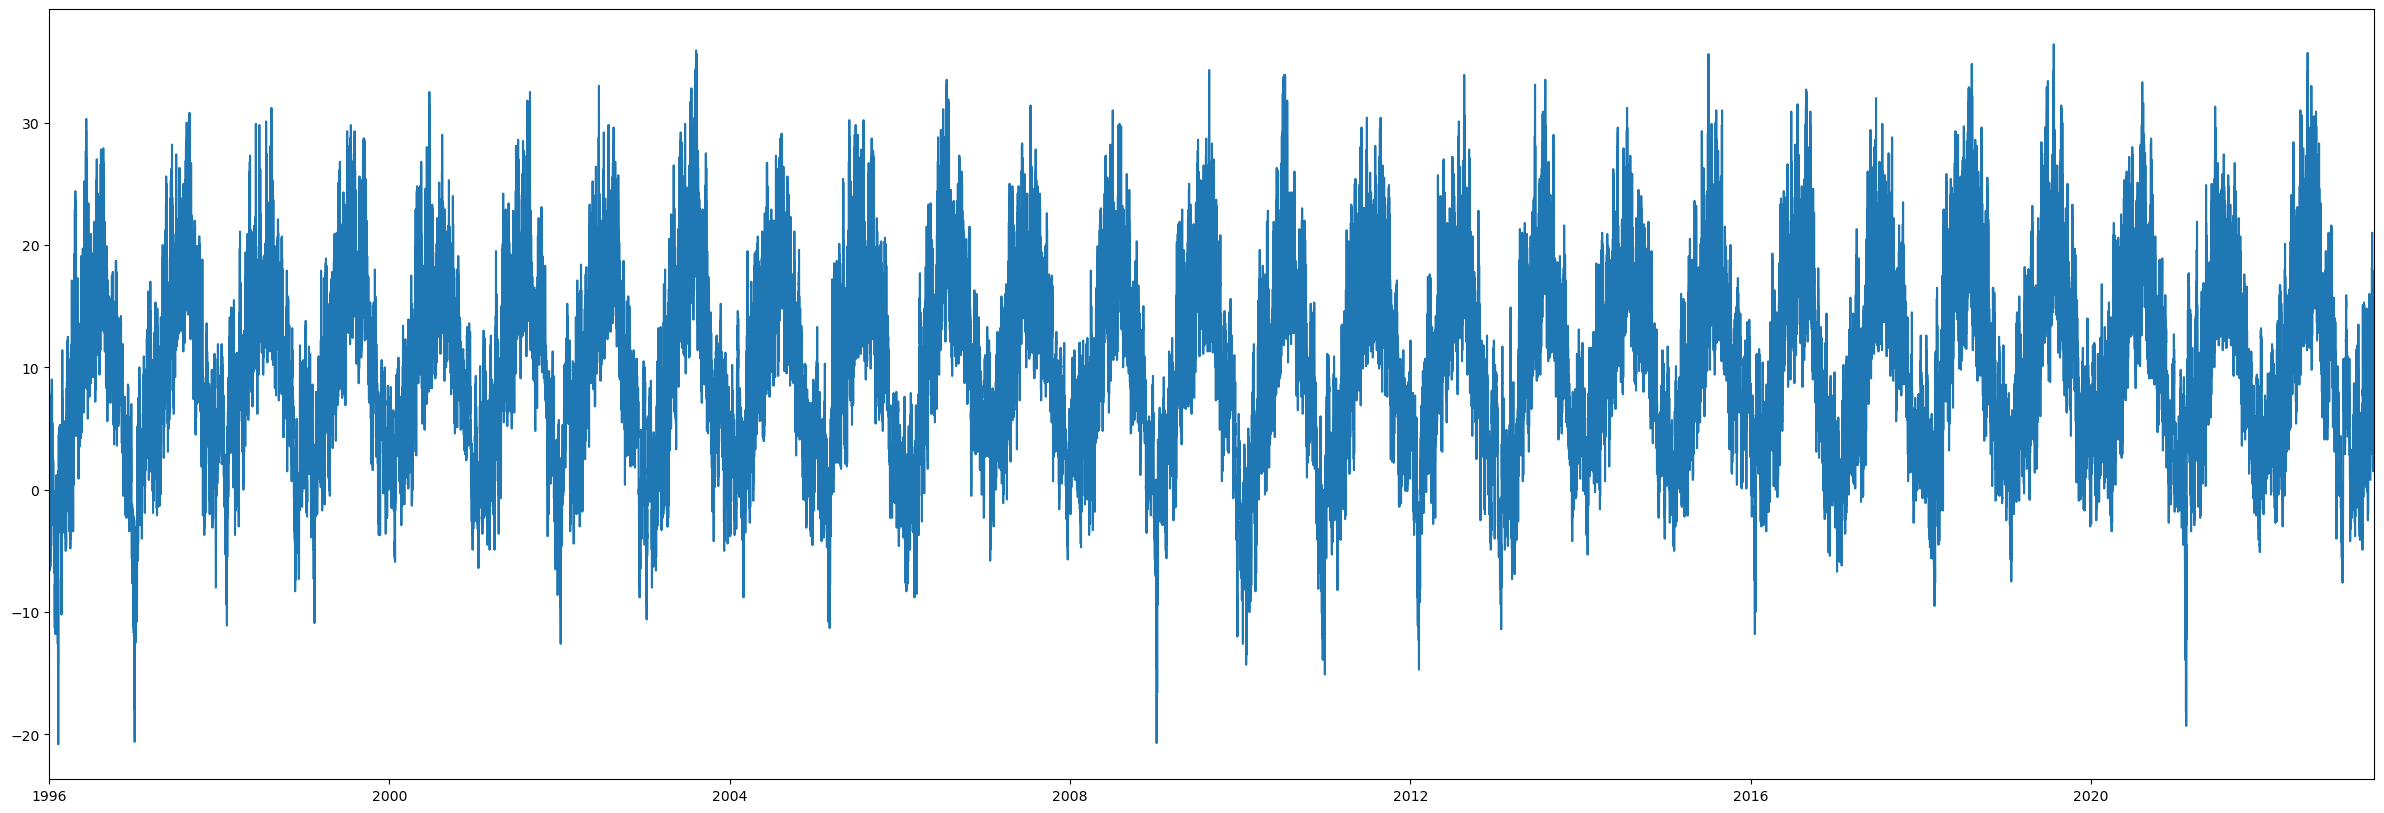

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,1996-01-01 00:00:00,-2.3,80,-5.3,-7.2,1003.4,988.2,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1,1996-01-01 01:00:00,-2.1,80,-5.2,-7.0,1003.8,988.6,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
2,1996-01-01 02:00:00,-2.0,79,-5.2,-6.9,1003.9,988.7,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
3,1996-01-01 03:00:00,-2.1,79,-5.3,-7.0,1004.0,988.8,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
4,1996-01-01 04:00:00,-2.2,78,-5.5,-7.1,1004.5,989.3,0.0,0.0,0.0,...,0.01,0.12,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("herford_weather.csv")
print("from " + str(df['time'].dtype))
df['time']=pd.to_datetime(df['time'])
print("to " + str(df['time'].dtype) + "\n ===============")
# datetime64[ns] is equal to <M8[ns] on little endian machines as this intel



plt.figure(figsize=(30,10))
plt.plot(df["time"], df['temperature_2m (°C)'])
plt.xlim(df['time'][0], df["time"].iat[-1])
plt.show()

df.head(5)

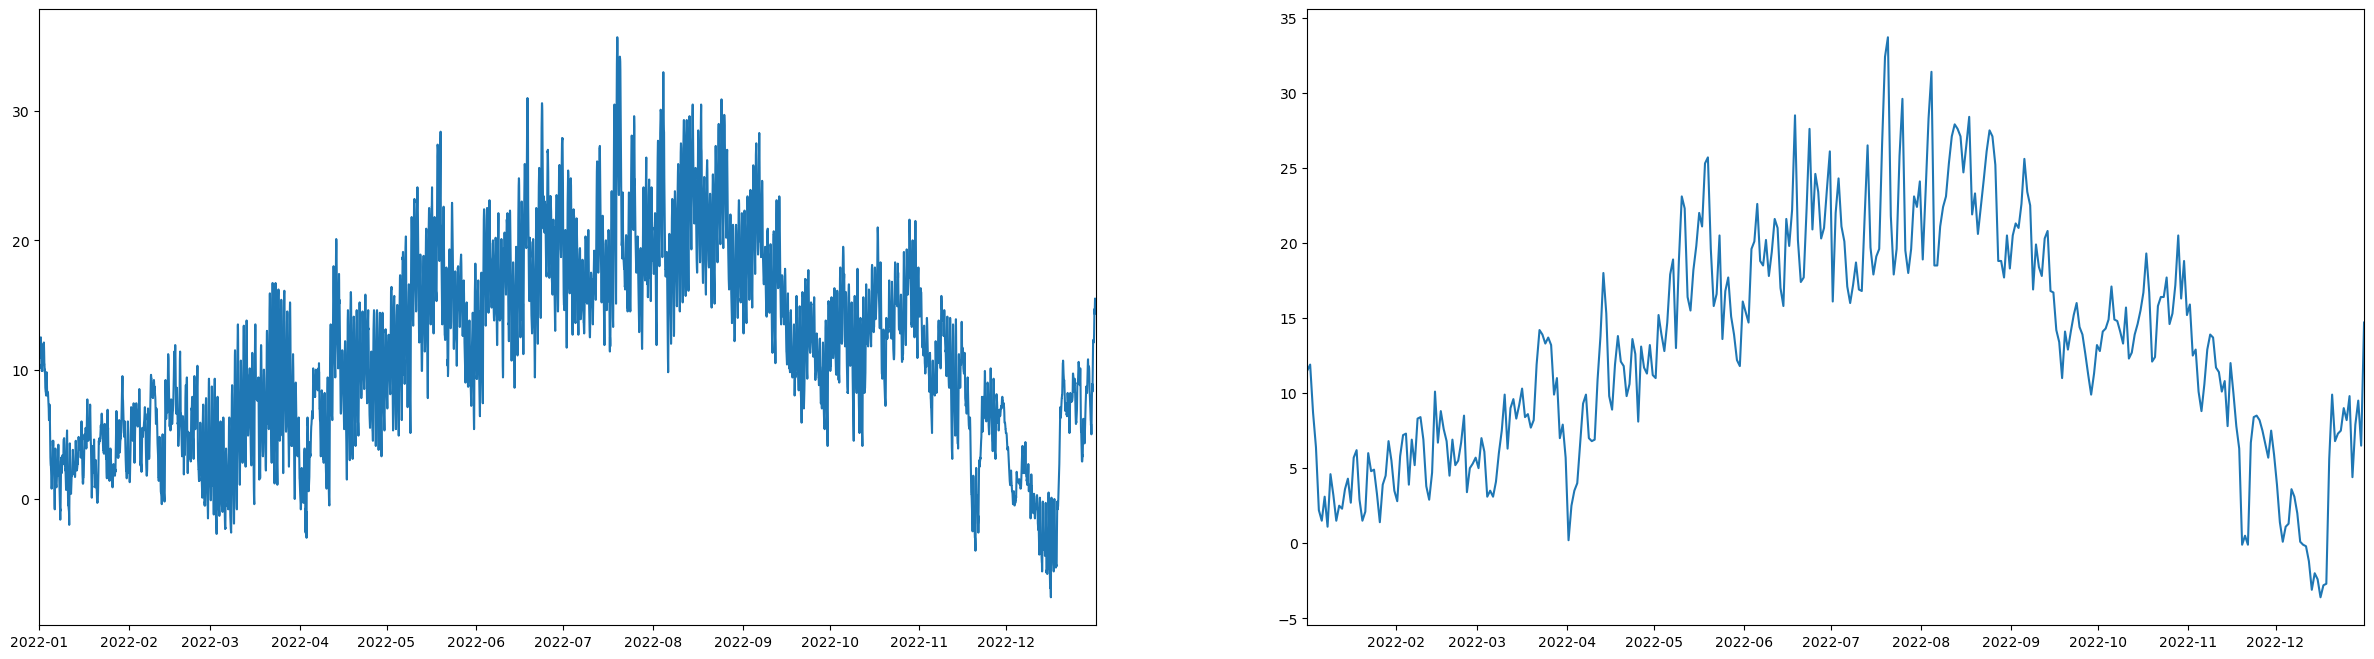

In [3]:
df_date = df[df['time'].dt.year == 2022]

fig, axs = plt.subplots(1,2)

fig.set_figwidth(30)
fig.set_figheight(8)

axs[0].plot(df_date["time"], df_date['temperature_2m (°C)'])
axs[0].set_xlim(df_date['time'].iat[0], df_date["time"].iat[-1])


df_daily = df_date[df_date['time'].dt.hour == 12]

axs[1].plot(df_daily["time"], df_daily['temperature_2m (°C)'])
axs[1].set_xlim(df_daily['time'].iat[0], df_daily["time"].iat[-1])

plt.show()

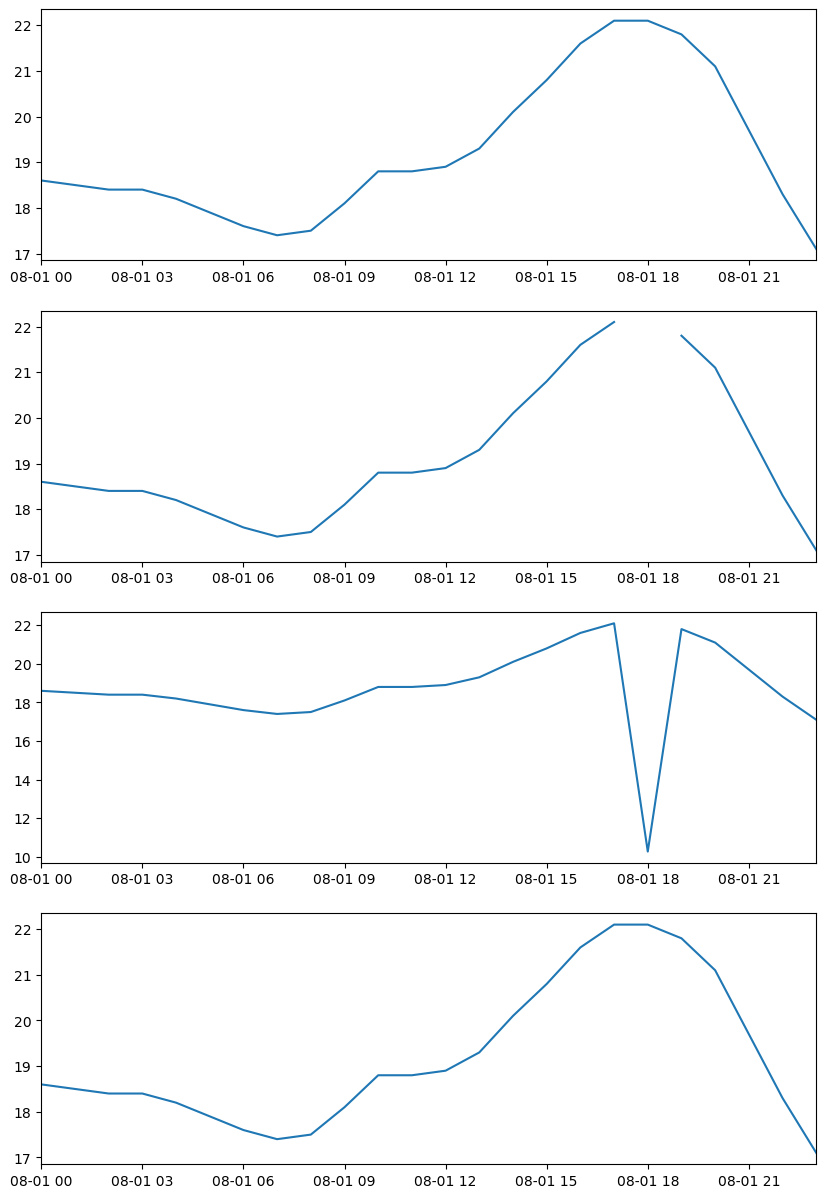

In [6]:
df_date = df[(df['time'].dt.year == 2022) & (df["time"].dt.month == 8) & (df["time"].dt.day == 1)]

fig, axs = plt.subplots(4,1)

fig.set_figwidth(10)
fig.set_figheight(15)

axs[0].plot(df_date["time"], df_date['temperature_2m (°C)'])
axs[0].set_xlim(df_date['time'].iat[0], df_date["time"].iat[-1])


df_date.loc[df['time'].dt.hour == 18, 'temperature_2m (°C)'] = None


axs[1].plot(df_date["time"], df_date['temperature_2m (°C)'])
axs[1].set_xlim(df_date['time'].iat[0], df_date["time"].iat[-1])


df_date.loc[df_date['time'].dt.hour == 18, 'temperature_2m (°C)'] = df['temperature_2m (°C)'].mean()


axs[2].plot(df_date["time"], df_date['temperature_2m (°C)'])
axs[2].set_xlim(df_date['time'].iat[0], df_date["time"].iat[-1])

df_date.loc[df_date['time'].dt.hour == 18, 'temperature_2m (°C)'] = df_date.loc[df_date['time'].dt.hour == 17, 'temperature_2m (°C)'].iloc[0]

axs[3].plot(df_date["time"], df_date['temperature_2m (°C)'])
axs[3].set_xlim(df_date['time'].iat[0], df_date["time"].iat[-1])

plt.show()

/tmp/ipykernel_57506/2169952413.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_june['rm'] = df['temperature_2m (°C)'].rolling(window=4,center=True).mean()


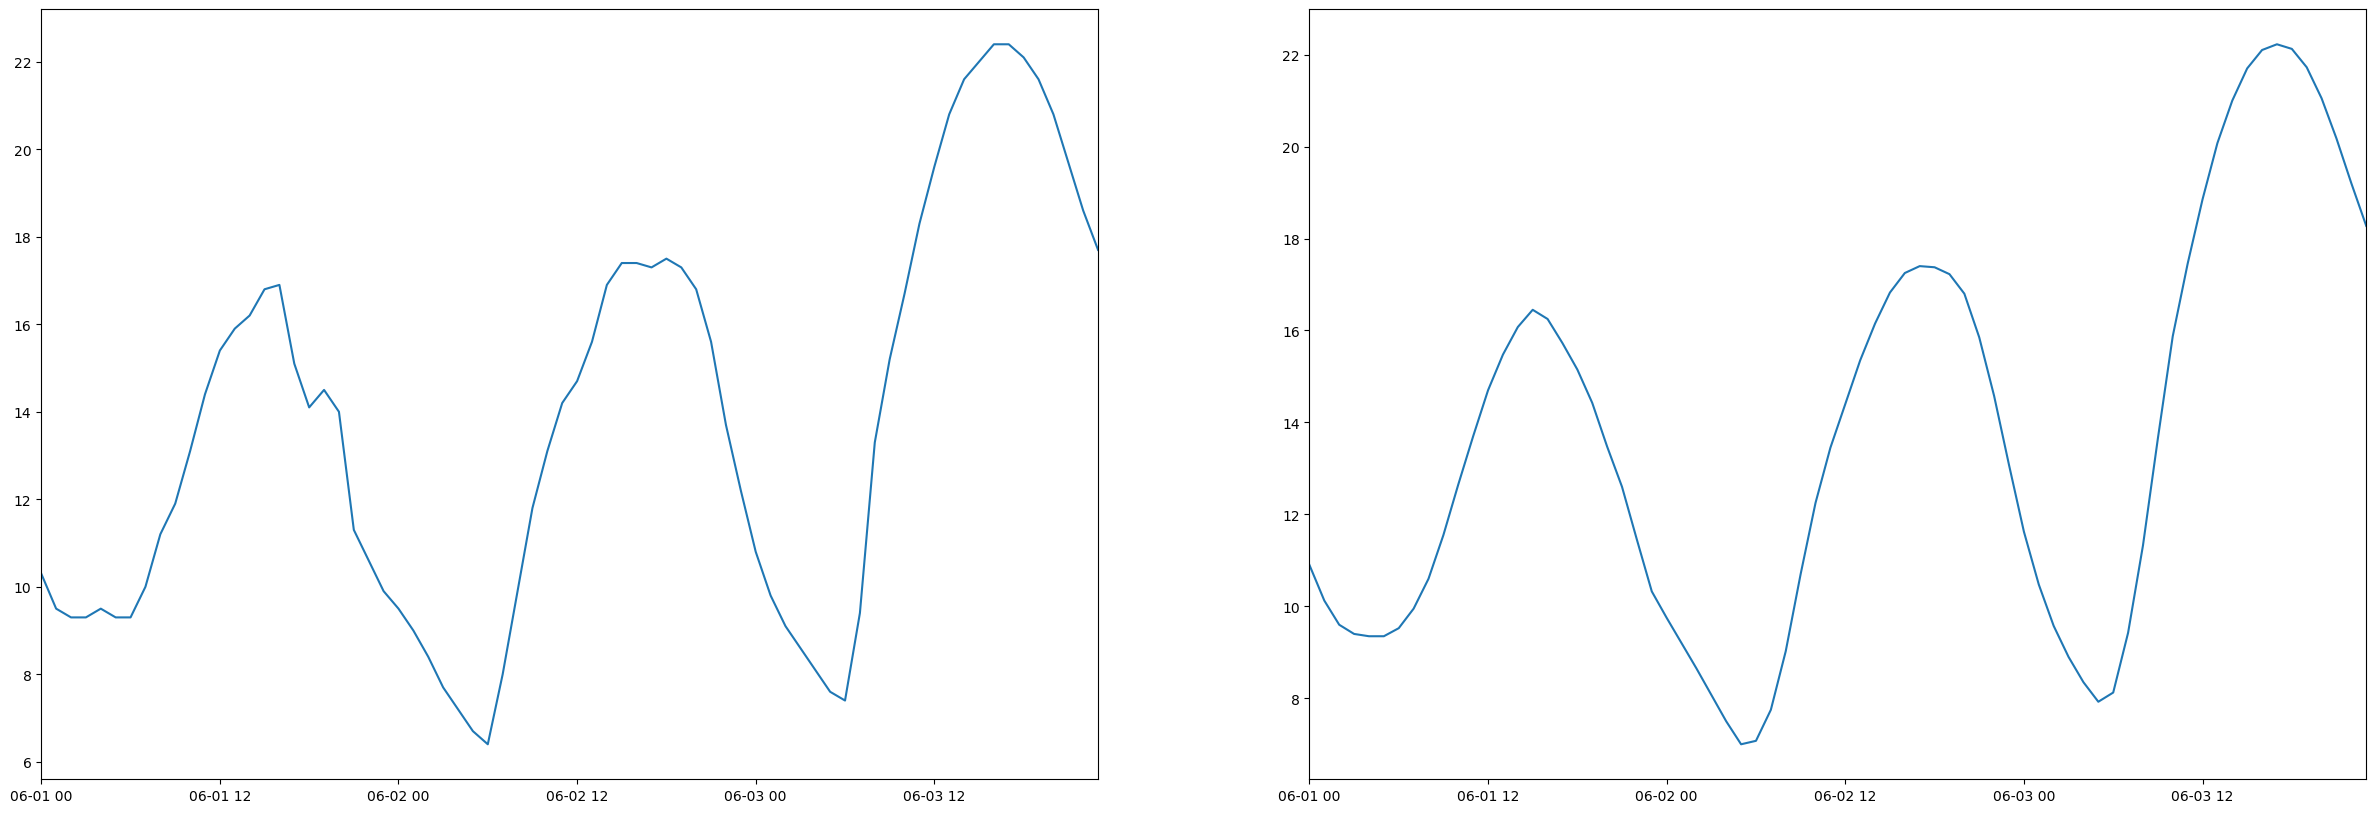

In [12]:
df_june = df[(df['time'].dt.year == 2022) & (df["time"].dt.month == 6) & (df["time"].dt.day >= 1)& (df["time"].dt.day <= 3)]

df_june['rm'] = df['temperature_2m (°C)'].rolling(window=4,center=True).mean()

fig, axs = plt.subplots(1,2)

fig.set_figwidth(30)
fig.set_figheight(10)

axs[0].plot(df_june["time"], df_june['temperature_2m (°C)'])
axs[0].set_xlim(df_june['time'].iat[0], df_june["time"].iat[-1])


axs[1].plot(df_june["time"], df_june['rm'])
axs[1].set_xlim(df_june['time'].iat[0], df_june["time"].iat[-1])

plt.show()